# Quantity Analysis - Time Series

## Objective
Analyze and forecast **quantity trends** over time using time series analysis techniques.

## Dataset Overview
The dataset contains timestamped records of quantities sold or produced.

## Workflow
1. Load the data
2. Explore time-based patterns
3. Resample and smooth
4. Train a forecasting model
5. Visualize predictions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("/content/Raw Data_Predictive Analysis.xlsx", sheet_name="Sheet1")
df.head()

,OrderDate,ParentProductIdNew,ParentProductNew,ProductCategoryNew,ArtistNameNew,total_qty_sales,Selling Price,productListViews,productListClicks
0,2019-01-01,11,Product 11,Category 1,TSSOS,3,399.0,NaN,NaN
1,2019-01-01,114,Product 114,Category 8,TSSA,10,549.0,NaN,NaN
2,2019-01-01,98,Product 98,Category 8,TSSHT,8,499.0,NaN,NaN
3,2019-01-01,97,Product 97,Category 8,TSSF,6,549.0,NaN,NaN
4,2019-01-01,8,Product 8,Category 1,TSSML,6,399.0,NaN,NaN


## Exploratory Data Analysis

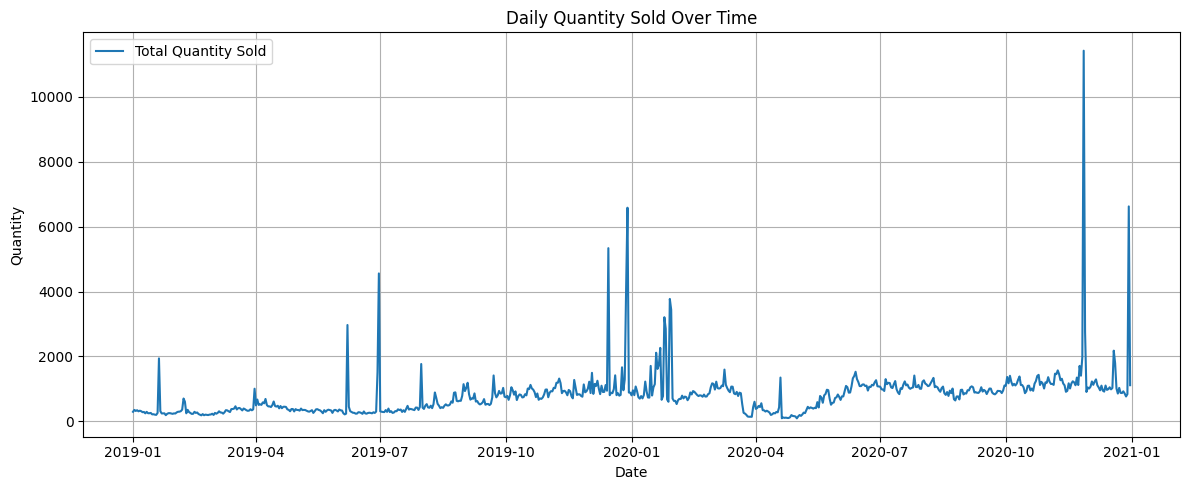

In [3]:
# Convert to datetime if necessary
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Group by date and sum total quantity
daily_qty = df.groupby('OrderDate')['total_qty_sales'].sum()

# Plot raw time series
plt.figure(figsize=(12, 5))
plt.plot(daily_qty, label='Total Quantity Sold')
plt.title("Daily Quantity Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Decomposition

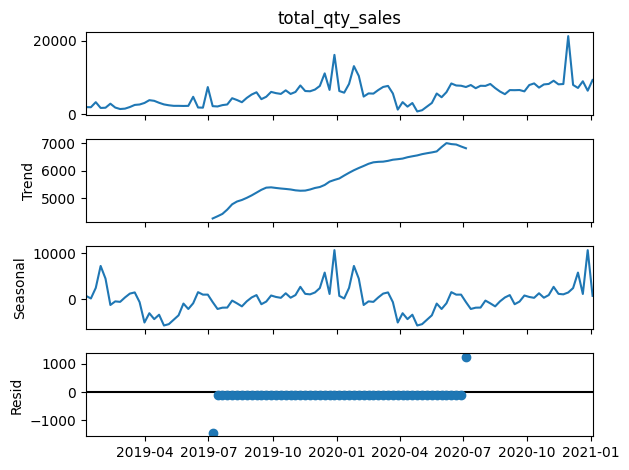

In [4]:
# Set date as index
weekly_qty = daily_qty.resample('W').sum()

# Decompose
decomposition = seasonal_decompose(weekly_qty, model='additive')
decomposition.plot()
plt.tight_layout()
plt.show()


## Modeling with ARIMA

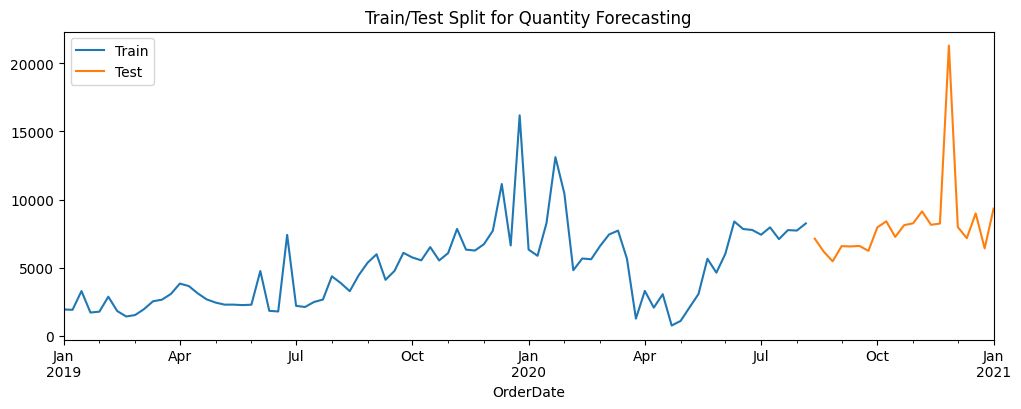

In [6]:
# Train-test split
split = int(len(weekly_qty) * 0.8)
train, test = weekly_qty[:split], weekly_qty[split:]

# Plot to confirm
plt.figure(figsize=(12, 4))
train.plot(label='Train')
test.plot(label='Test')
plt.title("Train/Test Split for Quantity Forecasting")
plt.legend()
plt.show()

# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))


## Evaluation and Visualization

Mean Squared Error: 9802985.80


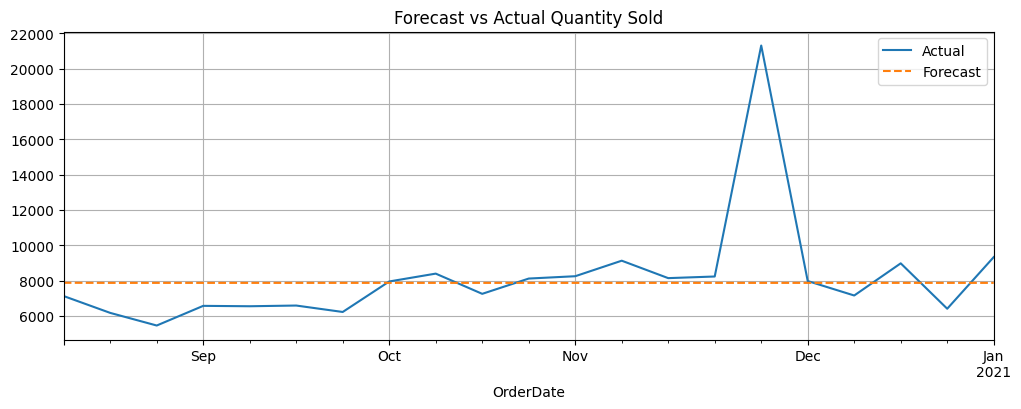

In [7]:
# Evaluation
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")

# Plot forecast vs actual
plt.figure(figsize=(12, 4))
test.plot(label='Actual')
forecast.index = test.index
forecast.plot(label='Forecast', style='--')
plt.title("Forecast vs Actual Quantity Sold")
plt.legend()
plt.grid()
plt.show()



## 🧾 Conclusion

Time series modeling was applied to understand and forecast quantity trends.  
**ARIMA** provided a simple baseline model.

📌 For improvement:
- Try **SARIMA** (seasonal ARIMA) to model seasonal effects
- Explore **Facebook Prophet** or **LSTM** for long-term or nonlinear patterns
